In [81]:
import matplotlib.pyplot as plt
import numpy as np
import time 
import random
from qulacs import QuantumState
from qulacs import QuantumCircuit
from qulacs.gate import DenseMatrix
from qulacs.circuit import QuantumCircuitOptimizer
from qulacs import Observable
from utility import *
import matplotlib.pyplot as plt

In [105]:
nqubits = 4 #量子ビット数
delta_t = 0.1 #トロッター刻み幅
tau = 1 #データ取得時間間隔
T=100 #終時刻


#Ising 相互作用のペアと結合定数
Ising_pairs = [[0,1],[2,3],[0,2],[1,3]]
Ising_couplings = [np.random.random() for i in range(len(Ising_pairs))]

#ハミルトニアンの定義
Hamiltonian = Observable(nqubits)

for i in range(len(Ising_pairs)):
        Hamiltonian.add_operator(Ising_couplings[i],f"Z {Ising_pairs[i][0]} Z {Ising_pairs[i][1]}")      
#show_observable(Hamiltonian)

#ハミルトニアンダイナミクス
dynamics = QuantumCircuit(nqubits)

dynamics.add_observable_rotation_gate(Hamiltonian, delta_t, int(tau/delta_t))

## 時刻Tまでのダイナミクスを見ておく

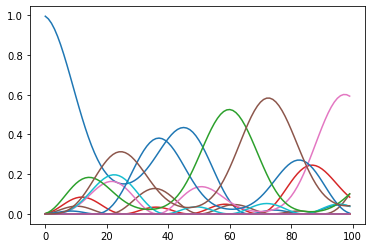

In [107]:
#|+>状態からスタートしてX基底での確率の時間発展をプロットしてみる
test = QuantumState(nqubits)
prob_list = []

for i in range(nqubits):
    H(i).update_quantum_state(test)

for j in range(int(T/tau)):
    dynamics.update_quantum_state(test)

    test_copy= test.copy()

    for i in range(nqubits):
        H(i).update_quantum_state(test_copy)

    comp_amp = test_copy.get_vector()
    prob_list.append(abs(comp_amp)**2)

plt.plot(prob_list)
plt.show()

## 時刻Tでサンプリングする

In [118]:
T=5 #終時刻

#初期状態の0 or 1の乱択
initial_state = np.random.randint(2**nqubits)

#初期状態の基底の乱択
initial_basis = [np.random.randint(2) for i in range(nqubits)]

#測定の基底の乱択
measurement_basis = [np.random.randint(2) for i in range(nqubits)]

#状態の確保
state = QuantumState(nqubits)

#乱択した状態に準備
state.set_computational_basis(initial_state)

#基底をランダムに変換
for i in range(nqubits):
    if initial_basis[i] == 1:
        H(i).update_quantum_state(state)

for j in range(int(T/tau)):
    dynamics.update_quantum_state(state)

#乱択した測定基底に変換
for i in range(nqubits):
    if measurement_basis[i] == 1:
        H(i).update_quantum_state(state)

#１つだけデータをサンプリング
outcome = state.sampling(1)[0]
print(bin(outcome))

0b1100
